In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip
import fastparquet
import os 
from datetime import datetime, timedelta 

In [71]:
# Directory containing the .kenv.gz files
station = 'P583'
years = [2023]
base_directory = '/media/parisnic/STOCKAGE/M2/GNSS_US/' #penser à mettre le / à la fin 


# Function to extract data from a single .kenv.gz file
def extract_data(file_path):
    data = []
    with gzip.open(file_path, 'rt') as file:
        lines = file.readlines()[1:]  # Skip the first line
        for line in lines:
            parts = line.split()
            data.append(parts[1:])
    return data

# Define column names based on your data structure
columns = [
    'sec-J2000', 'MJD', 'year', 'mm', 'dd', 'doy', 's-day',
    'e-ref(m)', 'n-ref(m)', 'v-ref(m)', 'e-mean(m)',
    'n-mean(m)', 'v-mean(m)', 'sig_e(m)', 'sig_n(m)', 'sig_v(m)'
]

for year in years:
    directory =base_directory + station+'/'+str(year)
    # List to store data from all files
    all_data = []
    # Iterate through files in the directory
    for doy in range(1,367): #pour pouvoir accepter années bissextiles
        try:
            filename = f'{station}.{year}.{doy:03}.kenv.gz'
            file_path = os.path.join(directory, filename)
            file_data = extract_data(file_path)
            all_data.extend(file_data)
        except:
            pass
        
    # Create a Pandas DataFrame
    df = pd.DataFrame(all_data, columns=columns)
    # Convert columns to appropriate data types (e.g., numeric)
    numeric_columns = columns[1:]  # Exclude the first column 'sec-J2000'
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
    #Compute the associated times in UTC datetime
    times = []
    for i in range(len(df['year'].values)):
        times.append(datetime(df['year'].values[i],df['mm'].values[i],df['dd'].values[i])+timedelta(seconds=int(df['s-day'].values[i])))
    #append the computed times to the dataframe
    df.insert(0, 'Time_UTC', times)
    #export the created dataframe
    df.to_parquet(base_directory+station+'/'+'data_'+str(year)+'.parquet')
    

In [72]:
# station = 'FARB'
year = 2023
base_directory = '/media/parisnic/STOCKAGE/M2/GNSS_US/'

df = pd.read_parquet(base_directory+station+'/'+'data_'+str(year)+'.parquet')

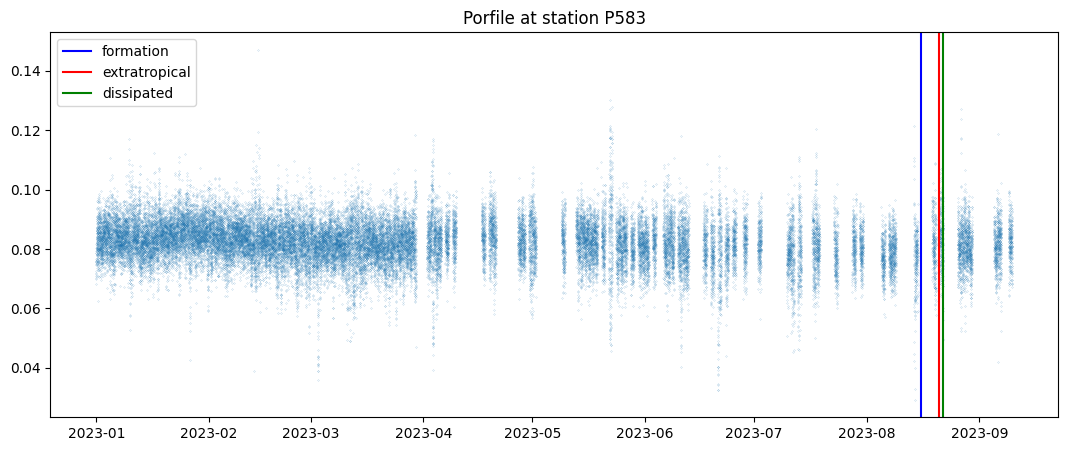

In [73]:
plt.figure(figsize=(13,5))
plt.plot(df['Time_UTC'].values,df['n-ref(m)'].values,linewidth=0,marker='.',markersize=0.2)
plt.title(f'Porfile at station {station}')

plt.axvline(x=datetime(2023,8,16),color ='blue',label='formation') #formation
plt.axvline(x=datetime(2023,8,21),color ='red',label='extratropical') #extratropical 
plt.axvline(x=datetime(2023,8,22),color ='green',label='dissipated')#dissipated
plt.legend()

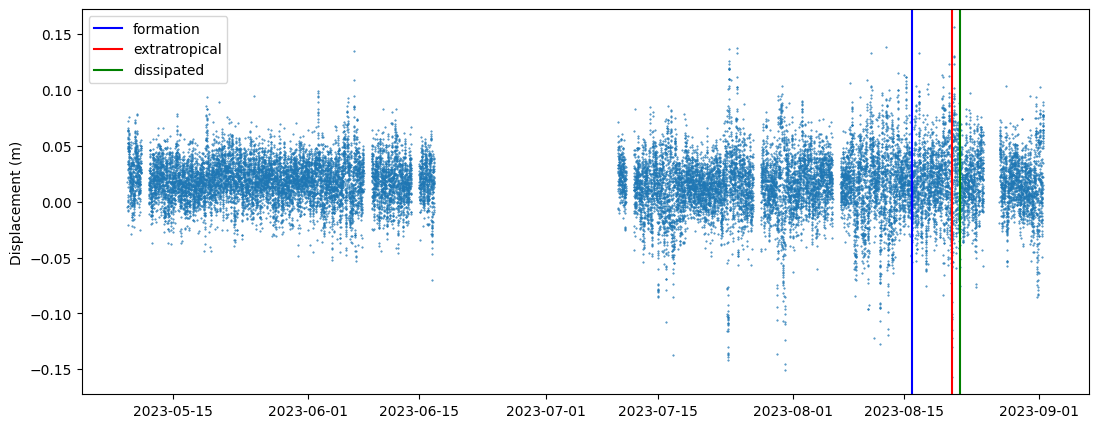

In [61]:
beg = 35500
end = -1000



plt.figure(figsize=(13,5))
plt.plot(df['Time_UTC'].values[beg:end],df['v-ref(m)'].values[beg:end],linewidth=0,marker='.',markersize=0.9)

plt.ylabel('Displacement (m)')

plt.axvline(x=datetime(2023,8,16),color ='blue',label='formation') #formation
plt.axvline(x=datetime(2023,8,21),color ='red',label='extratropical') #extratropical 
plt.axvline(x=datetime(2023,8,22),color ='green',label='dissipated')#dissipated
plt.legend()



In [90]:
print(np.where(df['Time_UTC'].values==datetime(2023,8,16)))

print(df['Time_UTC'].values[0])
print(datetime(2023,8,16))

(array([], dtype=int64),)
2023-01-01T00:00:00.000000000
2023-08-16 00:00:00
